In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
INPUT_FILE = '../data/histogram.csv'
COLUMNS_FILE = '../data/columns.csv'

In [3]:
def get_columns():
    fin = open(COLUMNS_FILE, 'r')
    col_data = fin.read()
    fin.close()
    columns_tmp = col_data.split(',')
    
    columns = []
    blank_counter = 0
    for col in columns_tmp:
        col_name = col
        if col == '-':
            blank_counter += 1
            col_name = 'blank_' + str(blank_counter)
        columns.append(col_name)
    return columns

def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) + "%" if pct > 0 else ''

In [4]:
columns = get_columns()

In [5]:
df = pd.read_csv(INPUT_FILE, names=columns)

## Repricing Analysis - Option 1

The following is an analysis of repricing the following Opcodes, from `3`to `2` gas:

- PUSH*
- SWAP*
- DUP*
- ADD
- SUB
- LT
- GT
- ISZERO
- SHL
- SHR

In [6]:
# Drop empty columns
for i in range (1, 115):
    df = df.drop('blank_' + str(i), 1)

/tmp/ipykernel_1027130/1662059355.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('blank_' + str(i), 1)


In [7]:
push_opcodes = ['PUSH' + str(i) for i in range(1, 33)]
dup_opcodes = ['DUP' + str(i) for i in range(1, 17)]
swap_opcodes = ['SWAP' + str(i) for i in range(1, 17)]

In [8]:
df['PUSH_TOTAL'] = df[push_opcodes].sum(axis=1)
df['PUSH_GAS'] = df['PUSH_TOTAL'] * 3
df['PUSH_GAS_RP'] = df['PUSH_TOTAL'] * 2
df['PUSH_GAS_DIF'] = df['PUSH_GAS'] - df['PUSH_GAS_RP']
df['GAS_M_PUSH'] = df['Gas used'] - df['PUSH_GAS_DIF'] - df['PUSH_GAS_RP']

In [9]:
df['DUP_TOTAL'] = df[dup_opcodes].sum(axis=1)
df['DUP_GAS'] = df['DUP_TOTAL'] * 3
df['DUP_GAS_RP'] = df['DUP_TOTAL'] * 2
df['DUP_GAS_DIF'] = df['DUP_GAS'] - df['DUP_GAS_RP']
df['GAS_M_DUP'] = df['Gas used'] - df['DUP_GAS_DIF'] - df['DUP_GAS_RP']

In [10]:
df['SWAP_TOTAL'] = df[swap_opcodes].sum(axis=1)
df['SWAP_GAS'] = df['SWAP_TOTAL'] * 3
df['SWAP_GAS_RP'] = df['SWAP_TOTAL'] * 2
df['SWAP_GAS_DIF'] = df['SWAP_GAS'] - df['SWAP_GAS_RP']
df['GAS_M_SWAP'] = df['Gas used'] - df['SWAP_GAS_DIF'] - df['SWAP_GAS_RP']

In [11]:
arith_opcodes = ['ADD', 'SUB', 'LT', 'GT', 'ISZERO', 'SHL', 'SHR']

for ao in arith_opcodes:
    df[ao + '_GAS'] = df[ao] * 3
    df[ao + '_GAS_RP'] = df[ao] * 2
    df[ao + '_GAS_DIF'] = df[ao + '_GAS'] - df[ao + '_GAS_RP']
    df['GAS_M_' + ao] = df['Gas used'] - df[ao + '_GAS_DIF'] - df[ao + '_GAS_RP']

In [12]:
df['ARITH_TOTAL'] = df[arith_opcodes].sum(axis=1)
df['ARITH_GAS'] = df['ARITH_TOTAL'] * 3
df['ARITH_GAS_RP'] = df['ARITH_TOTAL'] * 2
df['ARITH_GAS_DIF'] = df['ARITH_GAS'] - df['ARITH_GAS_RP']
df['GAS_M_ARITH'] = df['Gas used'] - df['ARITH_GAS_DIF'] - df['ARITH_GAS_RP']

In [13]:
df['GAS_RP'] = df['PUSH_GAS_RP'] +  df['SWAP_GAS_RP'] + df['DUP_GAS_RP'] + df['ADD_GAS_RP'] + df['SUB_GAS_RP'] + df['LT_GAS_RP'] + df['GT_GAS_RP'] + df['ISZERO_GAS_RP'] + df['SHL_GAS_RP'] + df['SHR_GAS_RP']
df['GAS_DIF'] = df['PUSH_GAS_DIF'] + df['SWAP_GAS_DIF'] + df['DUP_GAS_DIF'] + df['ADD_GAS_DIF'] + df['SUB_GAS_DIF'] + df['LT_GAS_DIF'] + df['GT_GAS_DIF'] + df['ISZERO_GAS_DIF'] + df['SHL_GAS_DIF'] + df['SHR_GAS_DIF']
df['GAS_M_RPDF'] = df['Gas used'] - df['GAS_DIF'] - df['GAS_RP']

### Results

In [14]:
fsize = 16

<AxesSubplot:ylabel='PUSH repricing'>

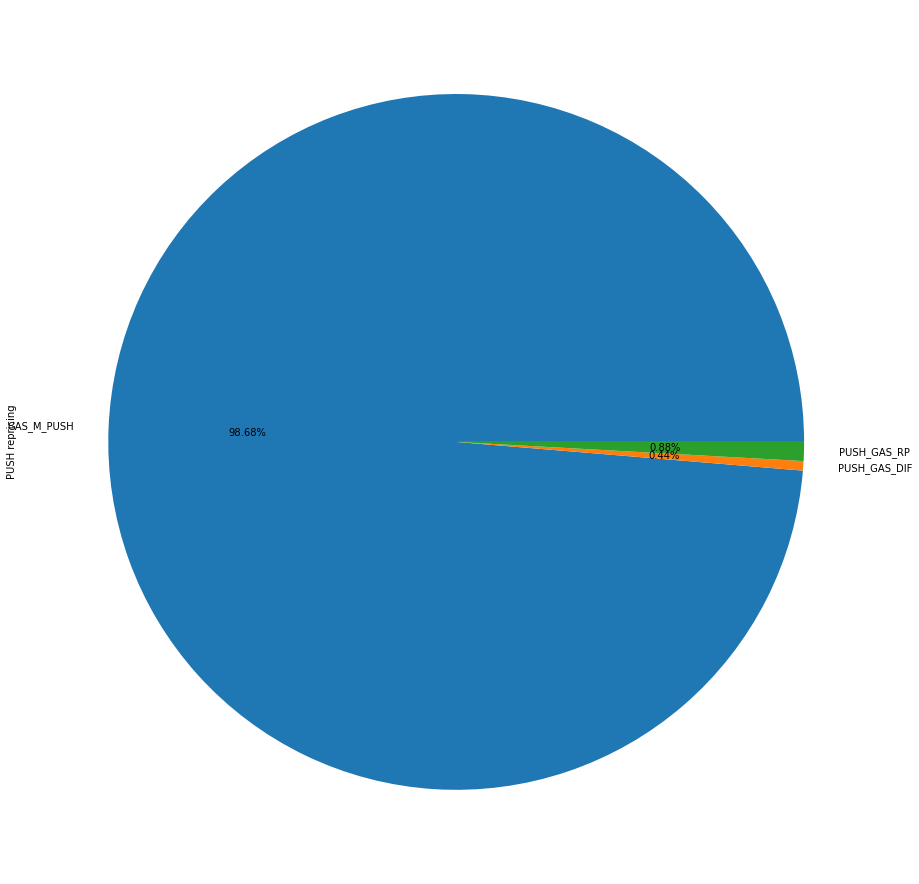

In [15]:
df[['GAS_M_PUSH', 'PUSH_GAS_DIF', 'PUSH_GAS_RP']].sum().plot(kind='pie', label='PUSH repricing', figsize=(fsize,fsize), autopct=autopct)

<AxesSubplot:ylabel='DUP repricing'>

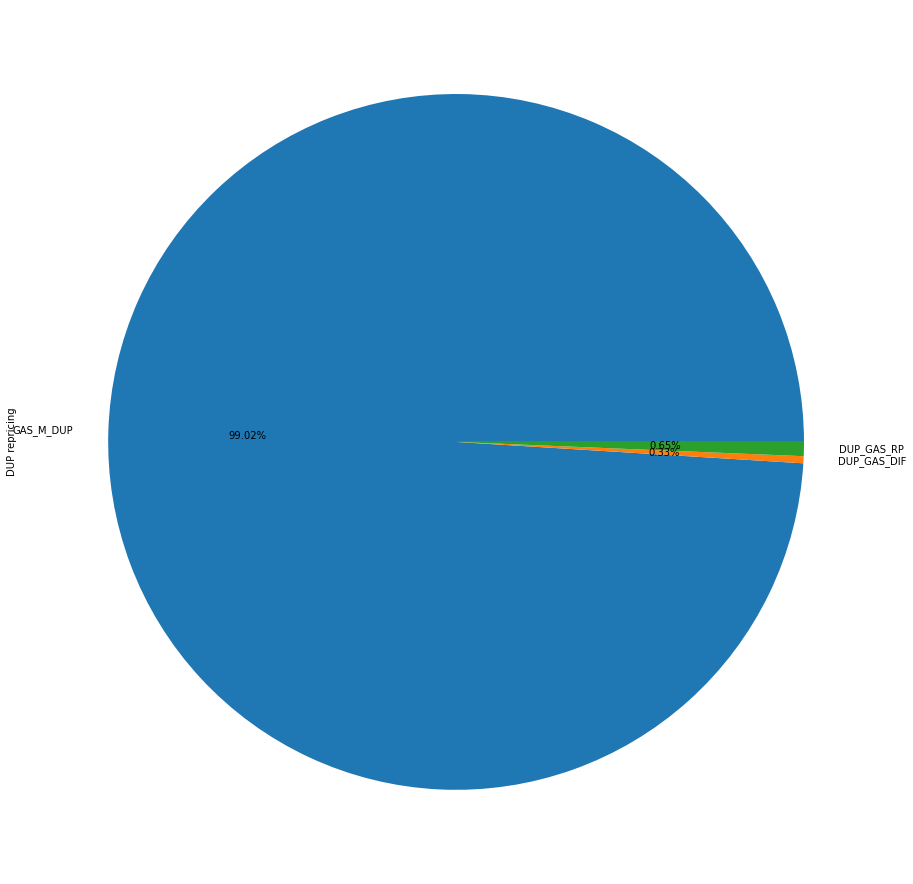

In [16]:
df[['GAS_M_DUP', 'DUP_GAS_DIF', 'DUP_GAS_RP']].sum().plot(kind='pie', label='DUP repricing', figsize=(fsize,fsize), autopct=autopct)

<AxesSubplot:ylabel='SWAP repricing'>

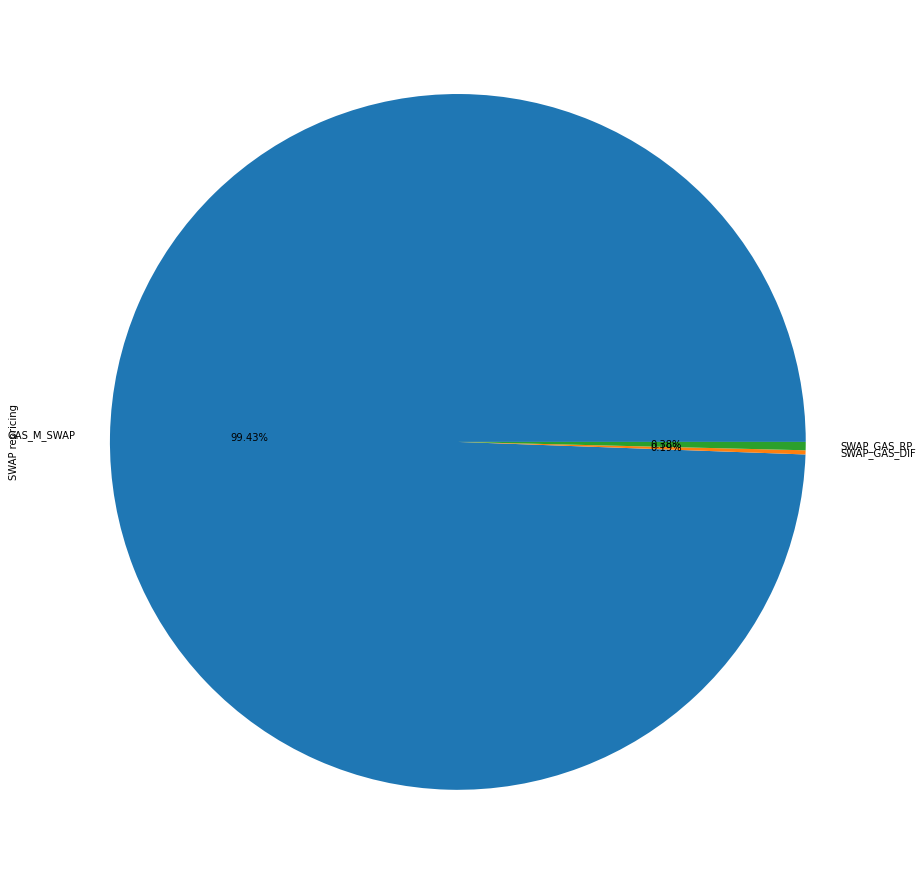

In [17]:
df[['GAS_M_SWAP', 'SWAP_GAS_DIF', 'SWAP_GAS_RP']].sum().plot(kind='pie', label='SWAP repricing', figsize=(fsize,fsize), autopct=autopct)

<AxesSubplot:ylabel='ADD repricing'>

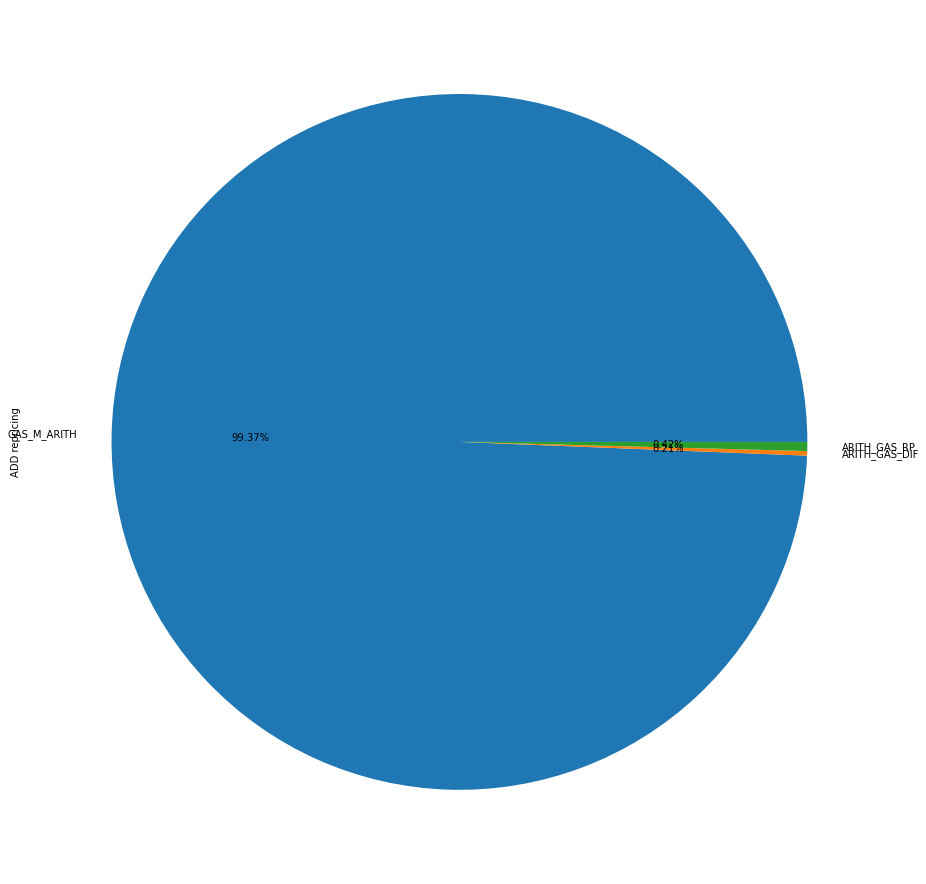

In [18]:
df[['GAS_M_ARITH', 'ARITH_GAS_DIF', 'ARITH_GAS_RP']].sum().plot(kind='pie', label='ADD repricing', figsize=(fsize,fsize), autopct=autopct)

<AxesSubplot:ylabel='Repricing'>

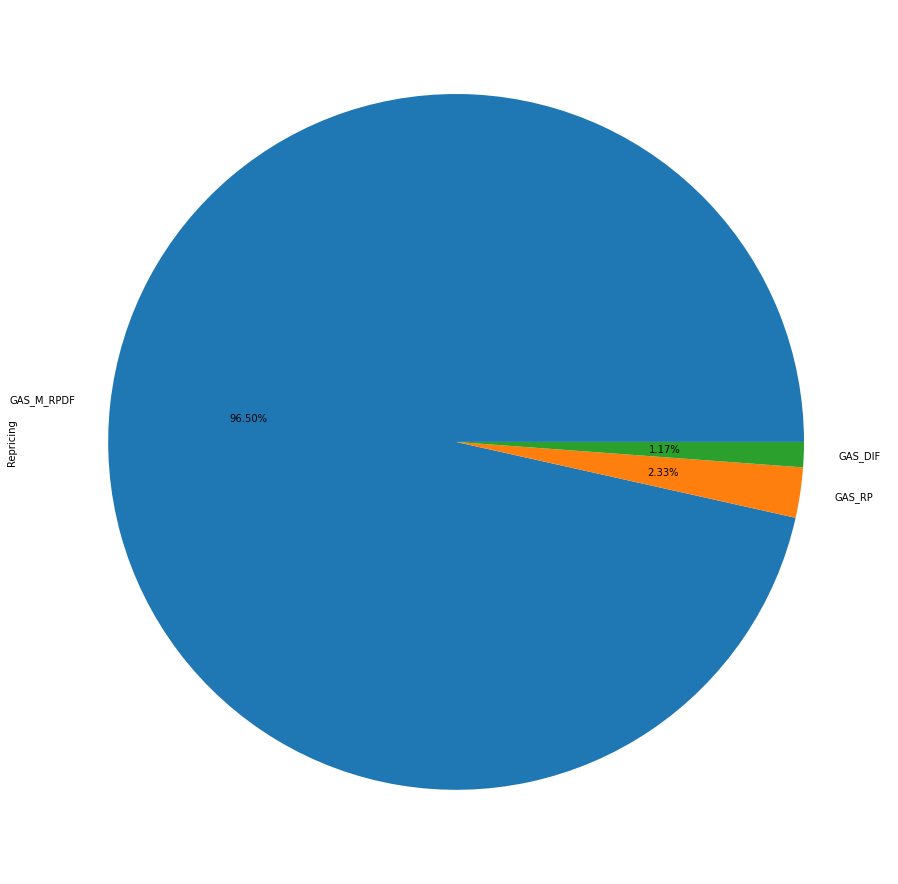

In [19]:
df[['GAS_M_RPDF', 'GAS_RP', 'GAS_DIF']].sum().plot(kind='pie', label='Repricing', figsize=(fsize,fsize), autopct=autopct)

## Repricing Analysis - Option 2 - Fractonal Gas

Based on [this](https://docs.google.com/spreadsheets/d/1OyvFQZON3AfwGLPgHutOEi03DSBI6rR5h8QS1YNqEpQ/edit#gid=0) analysis. Repricing the following opcodes:

|name     |Current Gas Cost|Proposed Gas cost|
|---------|----------------|-----------------|
| JUMPDEST|       1        |  0.4            |
| NOT     |       3        |  0.5            |
| MUL     |       3        |  1.6            |
| PUSH*   |       3        |  0.7            | 
| DUP*    |       3        |  0.6            |


## Repricing Analysis - Option 3 - (Rounded) Fractional Gas

Reference: <https://notes.ethereum.org/wt5uVsd4SRGATo5-ekIMfw>

|Opcode| Gas Cost | Proposed Gas Cost | Mnemonic |
|------|----------|-------------------|----------|
|0x00  | 0, 0, STOP
|0x01  | 3, 1, ADD
|0x02  | 5, 2, MUL
|0x03  | 3, 1, SUB
|0x10  | 3, 1, LT
|0x11  | 3, 1, GT
|0x12  | 3, 1, SLT
|0x13  | 3, 1, SGT
|0x14  | 3, 1, EQ
|0x15  | 3, 1, ISZERO
|0x16  | 3, 1, AND
|0x17  | 3, 1, OR
|0x18  | 3, 1, XOR
|0x19  | 3, 1, NOT
|0x50  | 2, 1, POP
|0x58  | 2, 1, PC
|0x60  | 3, 1, PUSH*
|0x80  | 3, 1, DUP*
|0x90  | 3, 1, SWAP*|
|0x9f  | 3, 1, SWAP16